## Генерация и визуализация

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np


data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=15)

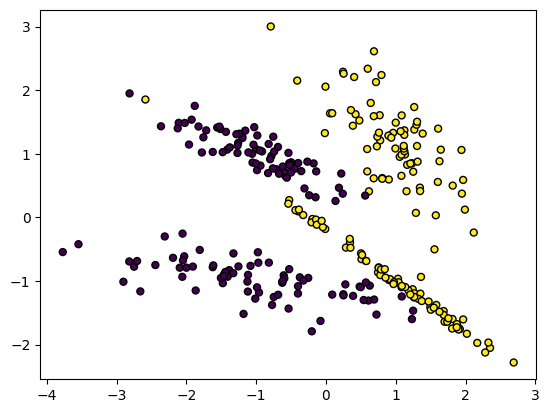

In [ ]:
# как видит классификатор
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

In [ ]:
data2, data2_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=891)

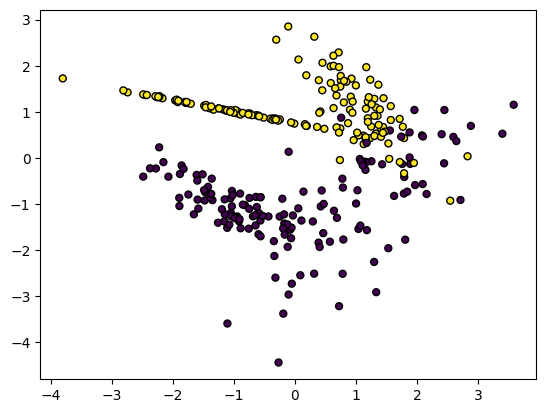

In [ ]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

In [ ]:
data3, data3_y = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=453)

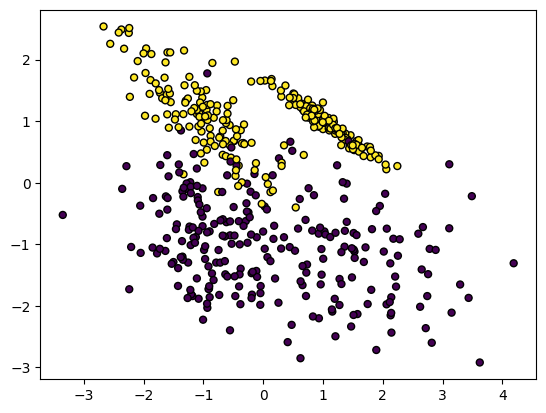

In [ ]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

## Подбор гиперпараметра

### Метод локтя

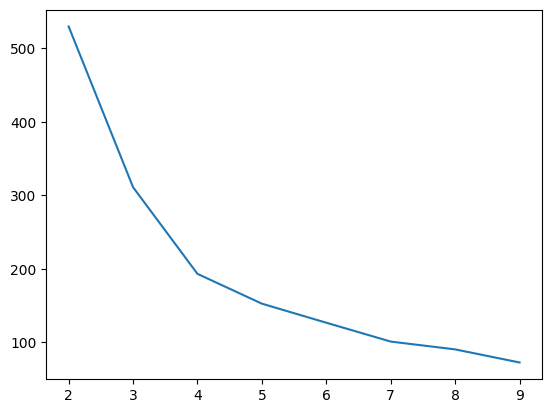

In [ ]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

### Метод силуэта

0.7488517279821628

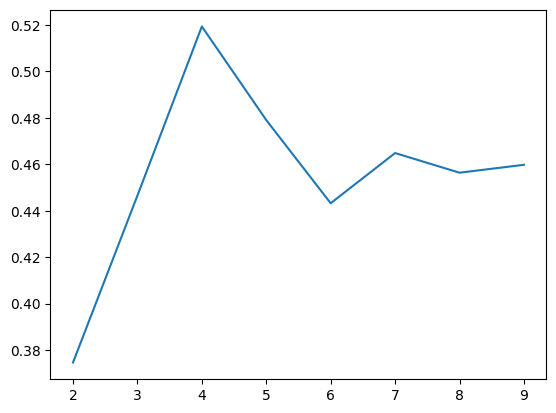

In [ ]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

plt.plot(range(2,10), ss)

rand_score(kmeans.labels_, data_y)

## Кластеризация

### KMeans

homogeneity_score:  0.5054282593414651
rand score:  0.6377480490523969
v_measure score:  0.33882268445697833
silhouette score:  0.5193663863345559
davies_bouldin_score:  0.6916308517718949


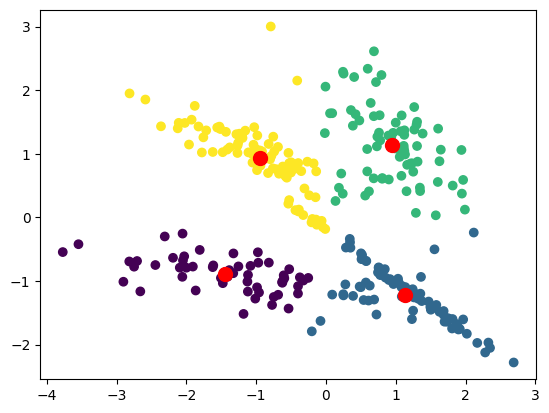

In [ ]:
kmeans = KMeans(4, n_init='auto').fit(data)

plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

print("homogeneity_score: ", homogeneity_score(data_y, kmeans.labels_))
print( "rand score: ", rand_score(data_y, kmeans.labels_))
print( "v_measure score: ", v_measure_score(data_y, kmeans.labels_))

print( "silhouette score: ", silhouette_score(data, kmeans.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, kmeans.labels_))

### Affinity propagation

homogeneity_score:  0.5537412732079979
rand score:  0.6100557413600892
v_measure score:  0.3173891552701482
silhouette score:  0.45981940835411755
davies_bouldin_score:  0.6900727077855412


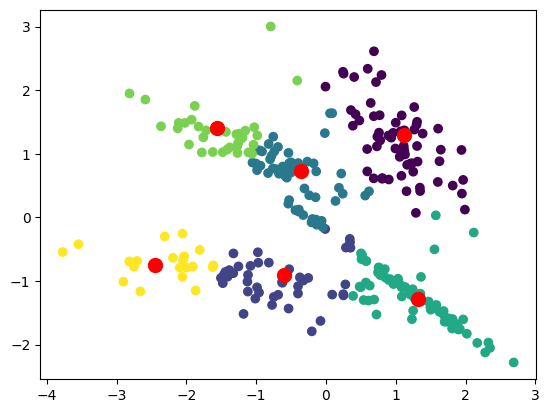

In [ ]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-50).fit(data)

plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

print("homogeneity_score: ", homogeneity_score(data_y, clustering.labels_))
print( "rand score: ", rand_score(data_y, clustering.labels_))
print( "v_measure score: ", v_measure_score(data_y, clustering.labels_))

print( "silhouette score: ", silhouette_score(data, clustering.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, clustering.labels_))



### DB-SCAN

[-1  0]
homogeneity_score:  0.002548785052673566
rand score:  0.4984169453734671
v_measure score:  0.0046250809202983394
silhouette score:  0.37080649115352715
davies_bouldin_score:  1.1559637837211887


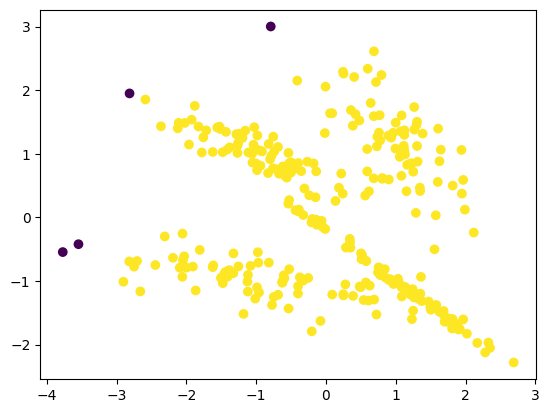

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN().fit(data)

print(np.unique(dbscan.labels_))

print("homogeneity_score: ", homogeneity_score(data_y, dbscan.labels_))
print( "rand score: ", rand_score(data_y, dbscan.labels_))
print( "v_measure score: ", v_measure_score(data_y, dbscan.labels_))

print( "silhouette score: ", silhouette_score(data, dbscan.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))

plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
homogeneity_score:  0.38074173604630357
rand score:  0.5224080267558529
v_measure score:  0.23181379548087944
silhouette score:  -0.2652233976851149
davies_bouldin_score:  2.0751227871345295


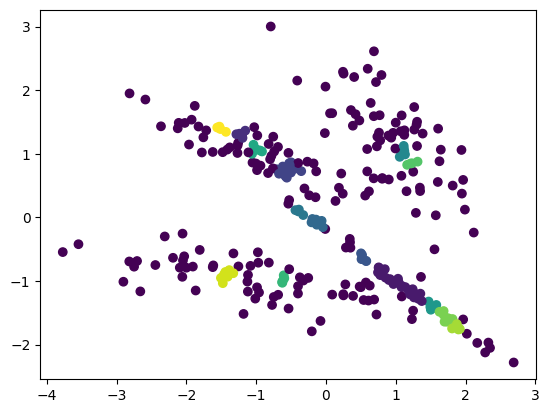

In [ ]:
m = 2*data.shape[1]
dbscan = DBSCAN(eps=0.1, min_samples=m).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

print("homogeneity_score: ", homogeneity_score(data_y, dbscan.labels_))
print( "rand score: ", rand_score(data_y, dbscan.labels_))
print( "v_measure score: ", v_measure_score(data_y, dbscan.labels_))

print( "silhouette score: ", silhouette_score(data, dbscan.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=m).fit(data)
distances, indices = nbrs.kneighbors(data)
distances

array([[0.        , 0.05391267, 0.05711496, 0.0637083 ],
       [0.        , 0.06492858, 0.10149544, 0.14738535],
       [0.        , 0.05674443, 0.0714024 , 0.14211979],
       ...,
       [0.        , 0.06368409, 0.0689623 , 0.06955911],
       [0.        , 0.09368303, 0.13293379, 0.17286085],
       [0.        , 0.13042959, 0.19813669, 0.21443014]])

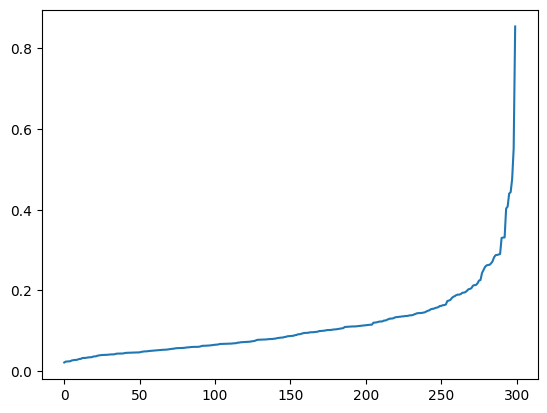

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2]
homogeneity_score:  0.24509493750180955
rand score:  0.5529319955406912
v_measure score:  0.1855145932331255
silhouette score:  0.4183177848963363
davies_bouldin_score:  2.538718554764774


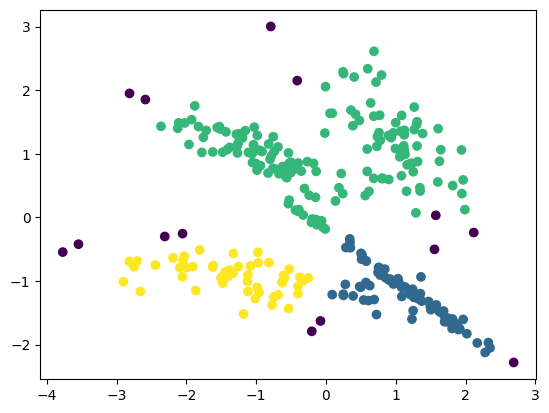

In [ ]:
dbscan = DBSCAN(eps=0.35, min_samples=m).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

print("homogeneity_score: ", homogeneity_score(data_y, dbscan.labels_))
print( "rand score: ", rand_score(data_y, dbscan.labels_))
print( "v_measure score: ", v_measure_score(data_y, dbscan.labels_))

print( "silhouette score: ", silhouette_score(data, dbscan.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))

### Gaussian Mixtures, EM

homogeneity_score:  0.9107922543578906
rand score:  0.7359643255295429
v_measure score:  0.6072986881704374
silhouette score:  0.3936088260758577
davies_bouldin_score:  0.8606780512780912


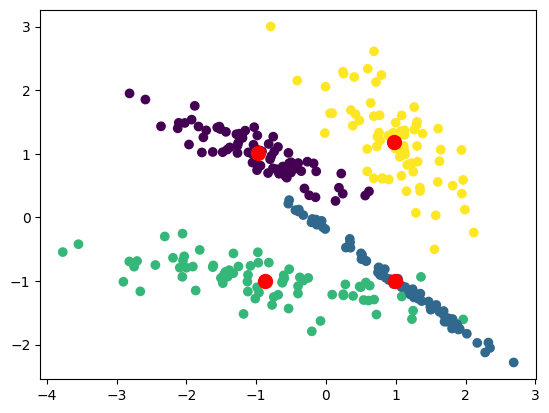

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4).fit(data)

gm.predict(data)

plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("homogeneity_score: ", homogeneity_score(data_y, gm.predict(data)))
print( "rand score: ", rand_score(data_y, gm.predict(data)))
print( "v_measure score: ", v_measure_score(data_y, gm.predict(data)))

print( "silhouette score: ", silhouette_score(data, gm.predict(data)))
print( "davies_bouldin_score: ", davies_bouldin_score(data, gm.predict(data)))

### Иерархическая кластеризация

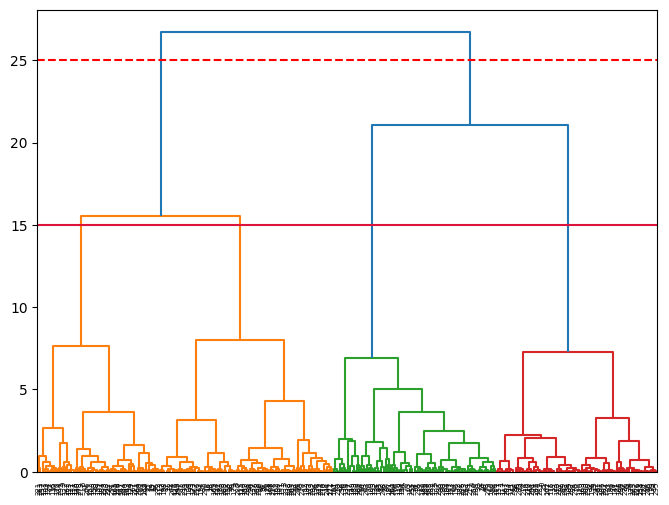

In [ ]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(25, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(15, color='crimson');

homogeneity_score:  0.5380247505975237
rand score:  0.6487625418060201
v_measure score:  0.3601417605847147
silhouette score:  0.5111514096579063
davies_bouldin_score:  0.7063970206475504


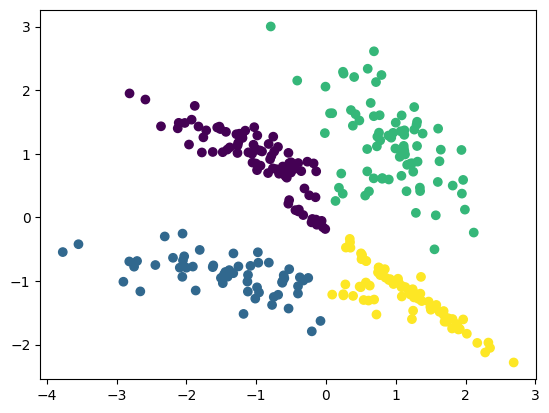

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data)
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)


print("homogeneity_score: ", homogeneity_score(data_y, clustering.labels_))
print( "rand score: ", rand_score(data_y, clustering.labels_))
print( "v_measure score: ", v_measure_score(data_y, clustering.labels_))

print( "silhouette score: ", silhouette_score(data, clustering.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, clustering.labels_))

### Карты Кохонена

In [ ]:
# simpSOM
# https://pypi.org/project/sklearn-som/
!pip install sklearn_som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_som.som import SOM

In [ ]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data)

In [ ]:
predictions = iris_som.predict(data)

print("homogeneity_score: ", homogeneity_score(data_y, iris_som.predict(data)))
print( "rand score: ", rand_score(data_y, iris_som.predict(data)))
print( "v_measure score: ", v_measure_score(data_y, iris_som.predict(data)))

print( "silhouette score: ", silhouette_score(data, iris_som.predict(data)))
print( "davies_bouldin_score: ", davies_bouldin_score(data, iris_som.predict(data)))

homogeneity_score:  0.45983253607723035
rand score:  0.7632329988851728
v_measure score:  0.4661566256143917
silhouette score:  0.36354843283810934
davies_bouldin_score:  1.1280454116358996


In [ ]:
predictions

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

## Kmeans

In [ ]:
def KMeanss(data, k=6, num_iter=10, min_distance=0.005, seed=0):
  np.random.seed(seed)
  centroid_ids = np.random.choice(data.shape[0], k, replace=False)
  centroids = data[centroid_ids]
  #print('First points:\n', centroids)

  for i in range(num_iter):
    clusters = {x: [] for x in range(k)}
    res = []

    for x in data:
      distances = np.linalg.norm(centroids - x, axis=1)
      cluster_ind = distances.argmin()
      clusters[cluster_ind].append(x)
      res.append(cluster_ind)
    new_centroids = {}
    count = []
    for cluster in clusters:
      new_centroids[cluster] = np.mean(clusters[cluster], axis=0)
      count.append(len(clusters[cluster]))

    new_centroids = np.array(list(new_centroids.values()))

    print(count)
    #print(new_centroids)

    is_stop = True
    for cluster in range(len(centroids)):
      if np.linalg.norm(centroids[cluster] - new_centroids[cluster]) > min_distance:
        is_stop = False
        break
    if is_stop:
      print(f'stopping at iter {i}')
      break

    centroids = new_centroids

  return centroids, clusters, res

In [ ]:
centroids, clusters, res = KMeanss(data)
import pandas as pd
from operator import itemgetter
pd.DataFrame(sorted(centroids, key=itemgetter(0)), columns=['x','y']).T


#print(res, data_y)
#print(data_y)
print("homogeneity_score: ", homogeneity_score(data_y, res))
print( "rand score: ", rand_score(data_y, res))
print( "v_measure score: ", v_measure_score(data_y, res))

print( "silhouette score: ", silhouette_score(data, res))
print( "davies_bouldin_score: ", davies_bouldin_score(data, res))
#centroids

[133, 73, 9, 34, 13, 38]
[103, 73, 8, 44, 22, 50]
[87, 70, 9, 52, 26, 56]
[82, 70, 10, 57, 32, 49]
[81, 70, 12, 57, 36, 44]
[79, 69, 13, 57, 36, 46]
[78, 69, 13, 57, 39, 44]
[78, 68, 14, 57, 39, 44]
[78, 68, 15, 57, 39, 43]
[78, 68, 17, 57, 39, 41]
homogeneity_score:  0.6050047285290402
rand score:  0.6220289855072464
v_measure score:  0.3501573689968701
silhouette score:  0.44877936547273595
davies_bouldin_score:  0.7120629152536725


In [ ]:
kmeans = KMeans(6).fit(data)
centrs = kmeans.cluster_centers_
pd.DataFrame(sorted(centrs, key=itemgetter(0)), columns=['x','y']).T

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5
x,-1.800425,-1.577527,-0.486746,0.096656,1.039990,1.521375
y,-0.824132,1.371492,0.789769,-0.880884,1.143751,-1.390588


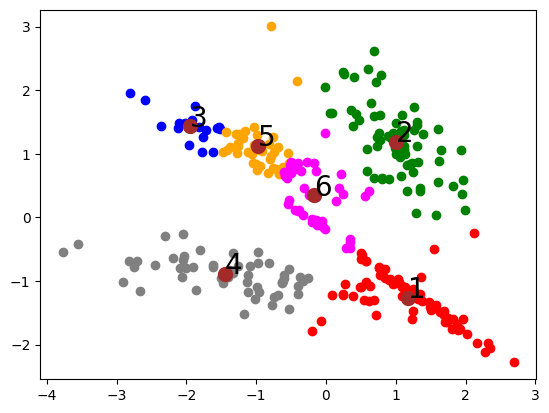

In [ ]:
colors = ['red', 'green', 'blue','grey','orange','magenta','black']
for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='o', s=100, c='brown')
    plt.text(centr[0], centr[1], f'{i+1}', fontsize=20);

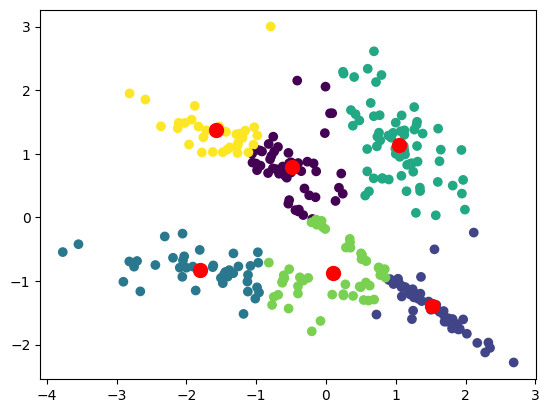

In [ ]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

[27, 67, 29, 27, 104, 46]
[32, 62, 22, 43, 95, 46]
[33, 63, 20, 45, 86, 53]
[32, 64, 21, 45, 83, 55]
[30, 64, 25, 46, 80, 55]
[28, 62, 27, 47, 80, 56]
[32, 62, 27, 47, 74, 58]
[36, 62, 27, 47, 68, 60]
[42, 60, 26, 47, 63, 62]
[44, 58, 26, 47, 62, 63]


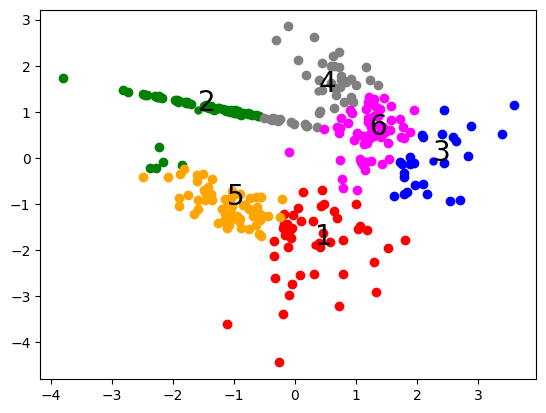

In [ ]:
centroids, clusters = KMeanss(data2)

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='o', s=25, c=colors[i])
    plt.text(centr[0], centr[1], f'{i+1}', fontsize=20);

[21, 57, 196, 19, 144, 63]
[29, 52, 151, 20, 148, 100]
[31, 47, 135, 24, 150, 113]
[33, 44, 135, 25, 141, 122]
[32, 44, 135, 27, 133, 129]
[33, 44, 136, 28, 129, 130]
[31, 45, 134, 31, 127, 132]
[33, 45, 135, 31, 126, 130]
[34, 45, 135, 33, 126, 127]
[37, 46, 134, 33, 126, 124]


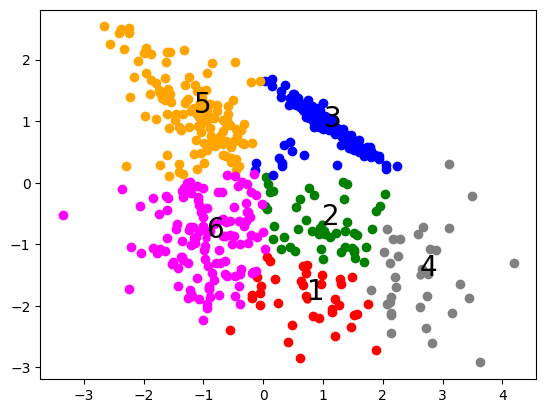

In [ ]:
centroids, clusters = KMeanss(data3)

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='o', s=25, c=colors[i])
    plt.text(centr[0], centr[1], f'{i+1}', fontsize=20);